### Report Q4

The code the question can be found in Q4.py file. We will import the functions defined in the file to demonstrate usbaility and give results for different questions.



In [9]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.transform import resize
import time

from Q4 import magnitude, scale_img
%matplotlib inline

## Task 1

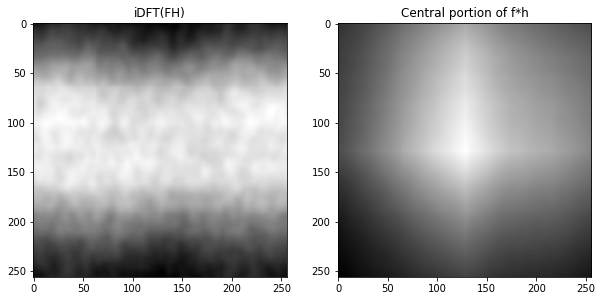

Average Squared distance between the two images is: 2733440001940.7666


In [5]:
f = imread("A3_resources/rice.png", as_gray=True)
h = imread("A3_resources/cameraman.jpg", as_gray=True)

F = np.fft.fft2(f)
F = np.fft.fftshift(F)

H = np.fft.fft2(h)
H = np.fft.fftshift(H)

F_dot_H = F * H
idft_F_dot_H = np.fft.ifft2(np.fft.ifftshift(F_dot_H))
mag_F_dot_H = magnitude(idft_F_dot_H)

f_conv_h = convolve2d(f, h)
m, n = f_conv_h.shape
central_portion = f_conv_h[m//4:m//4 + m//2 + 1, m//4:m//4 + m//2 + 1]

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(mag_F_dot_H, 'gray')
plt.title('iDFT(FH)')

plt.subplot(122)
plt.imshow(central_portion, 'gray')
plt.title('Central portion of f*h')
plt.show()

dist = np.mean((mag_F_dot_H - central_portion) ** 2)
print("Average Squared distance between the two images is: {}".format(dist))

## Task 2

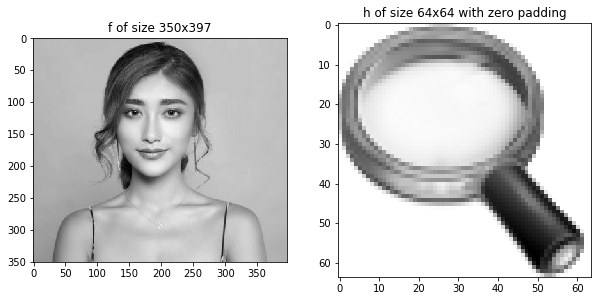

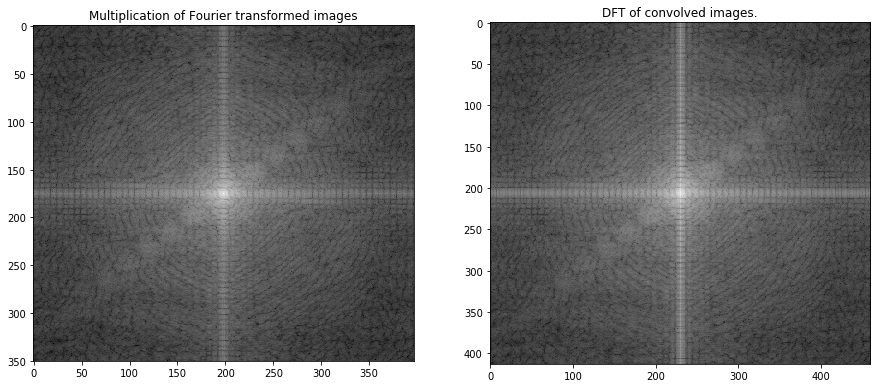

In [7]:
f = imread("A3_resources/5.jpeg", as_gray=True)

h = imread("A3_resources/64x64.png", as_gray=True)
h_pad = np.pad(h, ((143, 143), (166, 167)), 'constant', constant_values=(0))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(f, 'gray')
plt.title('f of size 350x397')

plt.subplot(122)
plt.imshow(h, 'gray')
plt.title('h of size 64x64 with zero padding')
plt.show()

F = np.fft.fft2(f)
H = np.fft.fft2(h_pad)
FH = np.fft.fftshift(F*H)
FH = scale_img(magnitude(FH))

f_conv_h = convolve2d(f, h)

DFT_fh = np.fft.fft2(f_conv_h)
DFT_fh = np.fft.fftshift(DFT_fh)
DFT_fh = scale_img(magnitude(DFT_fh))

plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(FH, 'gray')
plt.title('Multiplication of Fourier transformed images')

plt.subplot(122)
plt.imshow(DFT_fh, 'gray')
plt.title('DFT of convolved images.')
plt.show()


## Task 3

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[0.06602025032043457, 0.07169485092163086, 0.07052826881408691, 0.06522226333618164]
[0.6649985313415527, 3.0929224491119385, 13.64247989654541, 70.25904273986816]


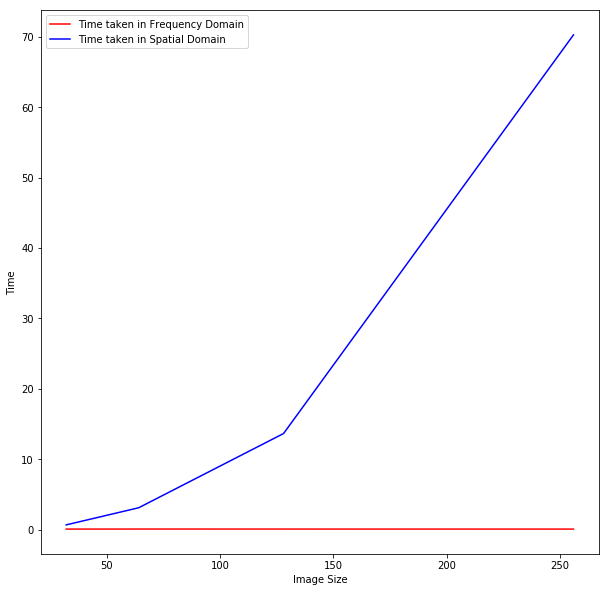

In [18]:
f = imread("A3_resources/1.tiff", as_gray=True)
h_original = imread("A3_resources/2.tiff", as_gray=True)

freq_time = []
spat_time = []
for n in [32, 64, 128, 256]:
    h = resize(h_original, (n, n))
    row_pad = (f.shape[0] - h.shape[0]) // 2
    col_pad = (f.shape[1] - h.shape[1]) // 2
    start = time.time()
    h_pad = np.pad(h, ((row_pad, row_pad), (col_pad, col_pad)), 'constant', constant_values=(0))
    F = np.fft.fft2(f)
    H = np.fft.fft2(h_pad)
    iDFT_FH = np.fft.ifft(F*H)
    iDFT_FH = scale_img(magnitude(iDFT_FH))
    end = time.time()
    freq_time.append(float(str(end-start)))

    start = time.time()
    f_conv_h = convolve2d(f, h)
    end = time.time()
    spat_time.append(float(str(end-start)))

print(freq_time)
print(spat_time)
plt.figure(figsize=(10, 10))
plt.plot([32, 64, 128, 256], freq_time, color='red', label="Time taken in Frequency Domain")
plt.plot([32, 64, 128, 256], spat_time, color='blue', label="Time taken in Spatial Domain")

plt.legend()
plt.xlabel("Image Size")
plt.ylabel("Time")
plt.show()


### For small size teh computation is equal both in the frequency domain as well as the spatial domain. However, as the image size increases, computation in the spatial domain becomes more and more expensive. This is because the FFT algorithm uses O(Nlog(N)) to compute the Fourier Transform and then uses matrix multiplication which is highly optimized. On the other hand, manual convolution does O(N^2) matrix multiplications and is therefore slower.

## Task 4

Time requried to compute = 0.14410829544067383s
Time requried to compute = 0.05105304718017578s


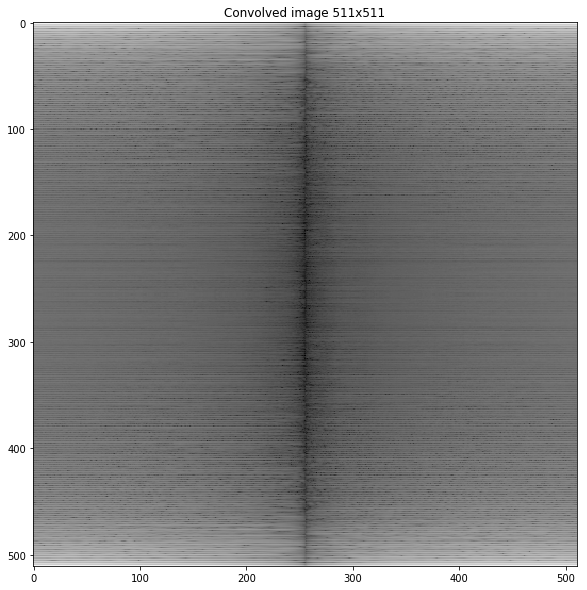

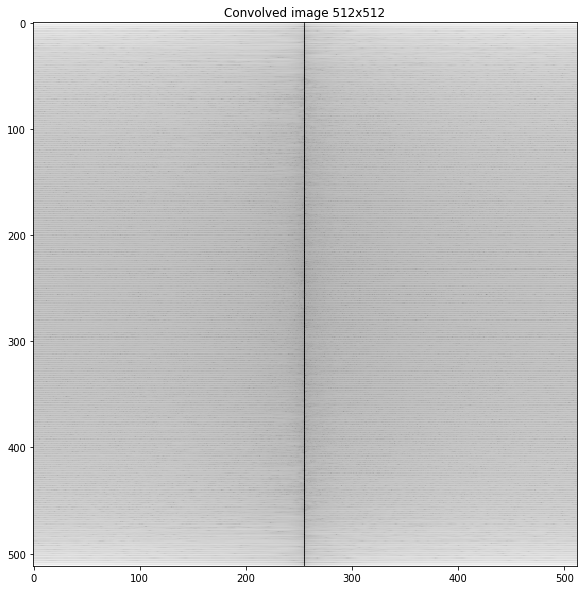

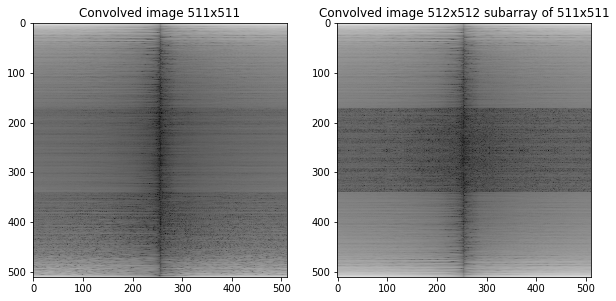

In [19]:
f = imread("A3_resources/cameraman.jpg", as_gray=True)
h = imread("A3_resources/rice.png", as_gray=True)

start = time.time()
f_pad = np.pad(f, ((128, 127), (128, 127)), 'constant', constant_values=(0))
h_pad = np.pad(h, ((128, 127), (128, 127)), 'constant', constant_values=(0))

F = np.fft.fftshift(np.fft.fft2(f_pad))
H = np.fft.fftshift(np.fft.fft2(h_pad))
f_conv_h = np.fft.ifft(np.fft.ifftshift(F * H))
f_conv_h_1 = scale_img(magnitude(f_conv_h))
end = time.time()

print("Time requried to compute = {}s".format(end-start))

start = time.time()
f_pad = np.pad(f, ((128, 128), (128, 128)), 'constant', constant_values=(0))
h_pad = np.pad(h, ((128, 128), (128, 128)), 'constant', constant_values=(0))

F = np.fft.fftshift(np.fft.fft2(f_pad))
H = np.fft.fftshift(np.fft.fft2(h_pad))
f_conv_h = np.fft.ifft(np.fft.ifftshift(F * H))
f_conv_h_2 = scale_img(magnitude(f_conv_h))
end = time.time()

print("Time requried to compute = {}s".format(end-start))

plt.figure(figsize=(10, 10))
plt.imshow(f_conv_h_1, "gray")
plt.title("Convolved image 511x511")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(f_conv_h_2, "gray")
plt.title("Convolved image 512x512")
plt.show()

subarray = np.hstack((f_conv_h_2[0:511, 0:255], f_conv_h_2[0:511, 256::]))
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(f_conv_h_1, "gray")
plt.title("Convolved image 511x511")

plt.subplot(122)
plt.imshow(subarray, "gray")
plt.title("Convolved image 512x512 subarray of 511x511")
plt.show()


### When computing the FFT for the 512x512 image, the computation is faster because 512 is a power of 2 and the FFT can be computed in O(Nlog(N)) time for powers of 2. After the convolution is done and the image is returned to the spatial domain, the central column of the image is nothing but zeros. Removing the central column and using the concatenated subarray array[0:511, 0:255] and array[0:511, 256::], we get the same result as that of convolution with the 511x511 image.